**классификатор изображений MPL**

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

# from tensorflow.keras.layers import Activation
# from tensorflow.keras.layers import Dropout

# from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import utils 


In [2]:
np.random.seed(1671)

In [3]:
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [6]:
NB_CLASSES = len(set(train_labels))
NB_CLASSES

10

In [7]:
# X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = train_images.shape[1]*train_images.shape[2]
RESHAPED

784

In [8]:
X_train = train_images.reshape(60000, RESHAPED).astype('float32')/255.
X_test = test_images.reshape(10000, RESHAPED).astype('float32')/255.

In [9]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [10]:
# utils.to_categorical(y_train, NB_CLASSES)

In [11]:
# convert class vectors to binary class matrices
Y_train = utils.to_categorical(train_labels, NB_CLASSES)
Y_test = utils.to_categorical(test_labels, NB_CLASSES)

---

In [12]:
N_HIDDEN = 128
DROPOUT = 0.7

In [13]:
model = Sequential()
model.add(Input( shape=(RESHAPED,), name='input1' ) )
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,), activation='relu', name='hidden1' ) )
model.add(Dense(N_HIDDEN, activation='relu', name='hidden2'))
model.add(Dense(NB_CLASSES, activation='softmax', name='out_softmax'))

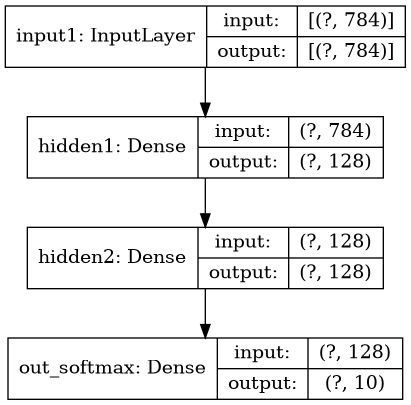

In [14]:
import IPython
from tensorflow.keras.utils import plot_model

# plot_model(model,to_file='result/model.png', show_layer_names=False, show_shapes=True )
plot_model(model,to_file='model.png', show_layer_names=True, show_shapes=True )
IPython.display.Image('model.png')

In [15]:
# model.summary()

---

In [16]:
model.compile( loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'] )

In [17]:
# network and training
NB_EPOCH = 50
BATCH_SIZE = 128
VERBOSE = 1
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [18]:
%%time 

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, 
                    epochs=NB_EPOCH,
                    verbose=VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 24us/sample - loss: 1.2345 - accuracy: 0.6144 - val_loss: 0.8107 - val_accuracy: 0.7147
Epoch 2/50
48000/48000 [==============================] - 1s 13us/sample - loss: 0.7297 - accuracy: 0.7495 - val_loss: 0.6594 - val_accuracy: 0.7742
Epoch 3/50
48000/48000 [==============================] - 1s 14us/sample - loss: 0.6194 - accuracy: 0.7920 - val_loss: 0.5818 - val_accuracy: 0.8046
Epoch 4/50
48000/48000 [==============================] - 1s 14us/sample - loss: 0.5613 - accuracy: 0.8108 - val_loss: 0.5408 - val_accuracy: 0.8161
Epoch 5/50
48000/48000 [==============================] - 1s 15us/sample - loss: 0.5266 - accuracy: 0.8215 - val_loss: 0.5162 - val_accuracy: 0.8220
Epoch 6/50
48000/48000 [==============================] - 1s 17us/sample - loss: 0.5016 - accuracy: 0.8292 - val_loss: 0.4908 - val_accuracy: 0.8309
Epoch 7/50
48000/48000 [==============================] 

48000/48000 [==============================] - 1s 14us/sample - loss: 0.3170 - accuracy: 0.8876 - val_loss: 0.3621 - val_accuracy: 0.8725
CPU times: user 50 s, sys: 4.66 s, total: 54.6 s
Wall time: 36.4 s


In [19]:
score = model.evaluate(X_test, Y_test, verbose=False)

print('Test accuracy:', score[1])

Test accuracy: 0.8644


---

In [20]:
import matplotlib.pyplot as plt

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

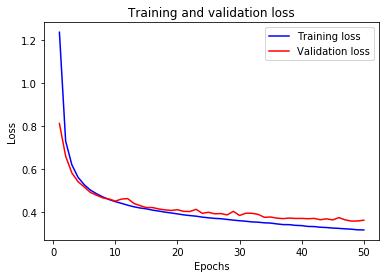

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

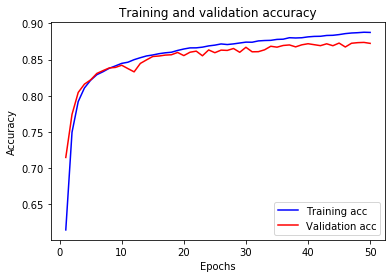

In [23]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

---

In [24]:
# class_names = [ 'T-shirt/top', 
#                 'Trouser', 
#                 'Pullover', 
#                 'Dress', 
#                 'Coat', 
#                 'Sandal', 
#                 'Shirt', 
#                 'Sneaker', 
#                 'Bag', 
#                 'Ankle boot' ]

In [25]:
class_names = [ 'футболка', 
                'брюки', 
                'свитер', 
                'платье', 
                'пальто', 
                'сандали', 
                'рубашка', 
                'тапки', 
                'сумка', 
                'полусапожки' ]

---

In [26]:
p = model.predict(X_test)
r = np.argmax(p,axis=1)
n = test_images.shape[1]

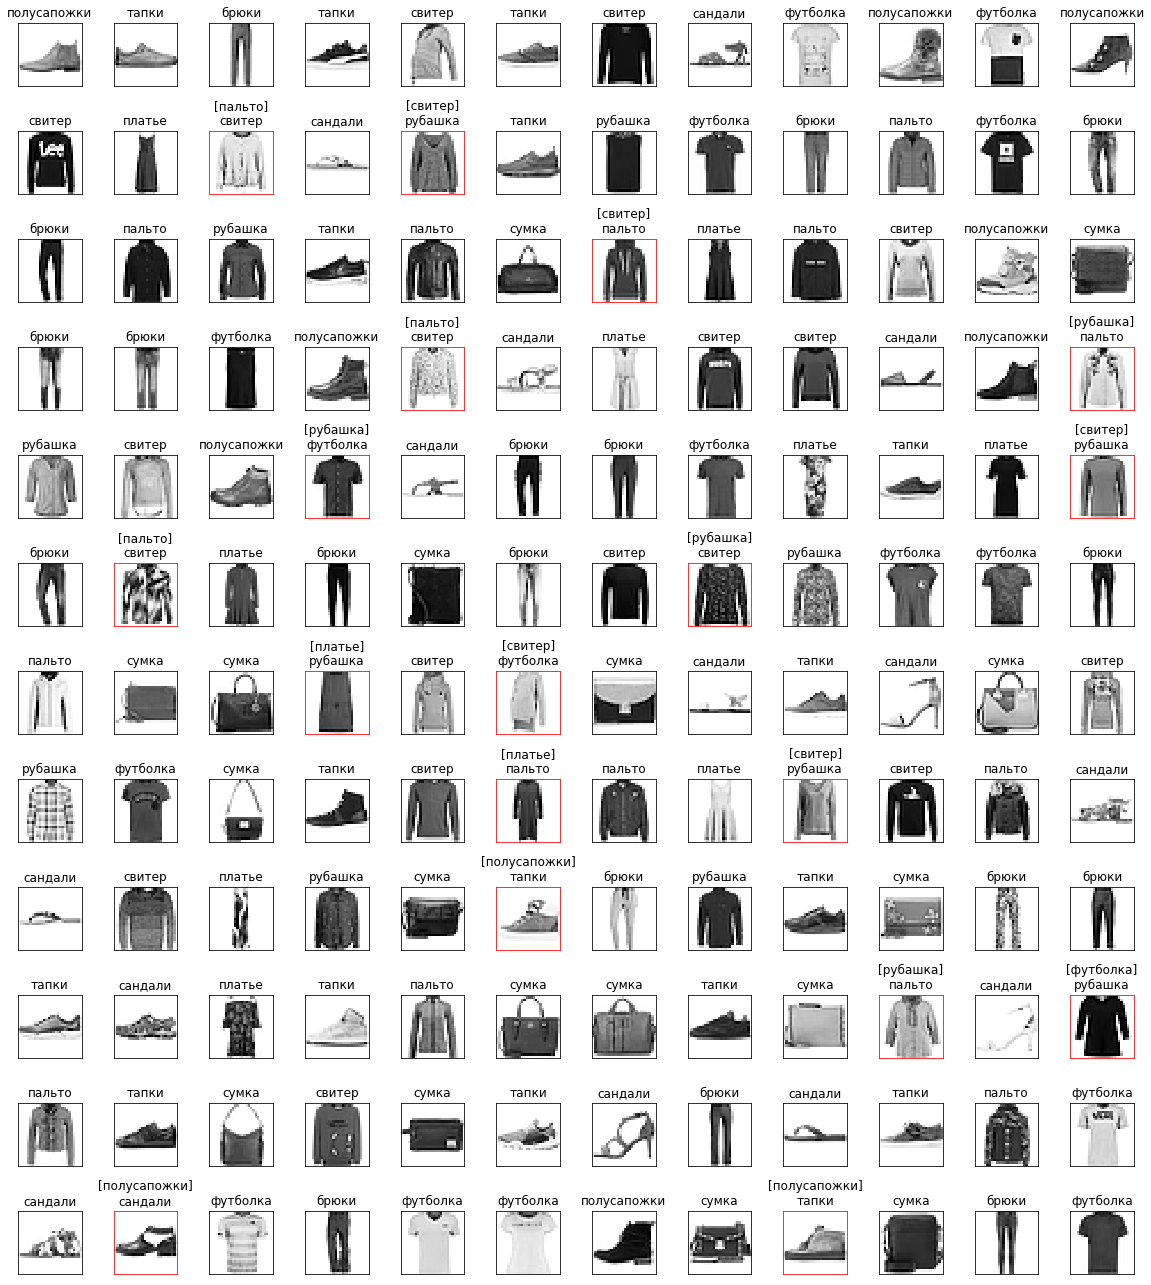

In [46]:
m=12

f, axarr = plt.subplots( m, m, figsize=(20,20))

k=0
for j in range(m):
    for i in range(m):
        k=m*j+i 
        axarr[i][j].axes.get_xaxis().set_visible(False)
        axarr[i][j].axes.get_yaxis().set_visible(False)
        
        axarr[i][j].imshow(
            test_images[k,:,:],
            cmap= plt.cm.Greys # if (r[k]==test_labels[k]) else plt.cm.terrain
        )
        axarr[i][j].set_title(
            class_names[r[k]] if (r[k]==test_labels[k]) else '['+class_names[test_labels[k]]+']\n'+class_names[r[k]]
        )
        
        if (r[k]!=test_labels[k]): 
            for spine in axarr[i][j].spines.values(): 
                spine.set_edgecolor('red')
                        
# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plt.subplots_adjust( top=1.0, hspace=0.5, wspace=0.5)
plt.show()

---

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

In [29]:
print('tensorflow:', tf.__version__)
print('keras:', keras.__version__)

if tf.test.is_built_with_cuda():
    print('GPU devices:\n  ',
        [ [x.name, x.physical_device_desc] 
          for x in device_lib.list_local_devices() 
          if x.device_type == 'GPU' ]
    )
    print('default GPU device:', tf.test.gpu_device_name() )

else:
    print('no GPU device found')
    

tensorflow: 2.0.0
keras: 2.2.4-tf
GPU devices:
   [['/device:GPU:0', 'device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1']]
default GPU device: /device:GPU:0
